In [185]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
params={
    'text.usetex':True,
    'font.family':'serif',
    'xtick.minor.visible':True,
    'ytick.minor.visible':True,
    'xtick.top':True,
    'ytick.left':True,
    'ytick.right':True,
    'xtick.direction':'out',
    'ytick.direction':'out',
    'xtick.minor.size':2.5,
    'xtick.major.size':5,
    'ytick.minor.size':2.5,
    'ytick.major.size':5,
    'axes.axisbelow':True
}
matplotlib.rcParams.update(params)

In [186]:
# Calculation of Cd

b = 2.2
c = 0.36
S = b*c
AR = (b**2)/S
e = 0.8
k = 1/(3.14*AR*e)

V = 14
# D = 0.5*1.225*V**2*S*0.8
# L = 0.5*1.225*V**2*S*0.8

In [187]:
AR

6.111111111111112

In [188]:
V_t = 10
# D_t = 0.5*1.225*V_t**2*S*0.8

In [189]:
## Level Constant Velocity Turn V = 14 m/s
q = 0.5*1.225*V**2
Cd_min = 0.8664627931/(q*S)
R = 16 # turn radius
n = np.sqrt(1+(V**2/(R*9.81))**2)

def turn_TW(WS, q, Cd_min, k, n):
    return q*(Cd_min/WS + k*(n/q)**2*WS)

In [190]:
## Desired Rate-of-climb

V_z = 3 # Ascend velocity
Cd_min = 0.8664627931/(q*S)
V_t = 10 # Take-off velocity

def roc_TW(WS, q, Cd_min, k, V_z, V_t):
    return (V_z/V_t + q/WS*Cd_min + k*WS/q)

In [191]:
## Desired Take-off Distance

S_t = 10 # Take-off distance
q_t = 0.5*1.225*V_t**2
Cd_t = 1.673802243/(q_t*S)

def to_TW(WS, q_t, Cd_t, S_t, V_t):
    return V_t**2/(2*9.81*S_t) + q_t*Cd_t/WS

In [192]:
TW = np.linspace(0, 2, 100)
WS = np.linspace(1, 110, 500)

In [193]:
T0 = 54.8
T = 43.5
Wt = 7*9.81
W0 = 4.5*9.81
Cl_max = 1.6
Ws = 0.5*1.225*V_t**2*S*Cl_max

In [194]:
def top_TW(WS, Cl_max, S_t):
    return WS/(Cl_max*9.81*S_t*1.225)

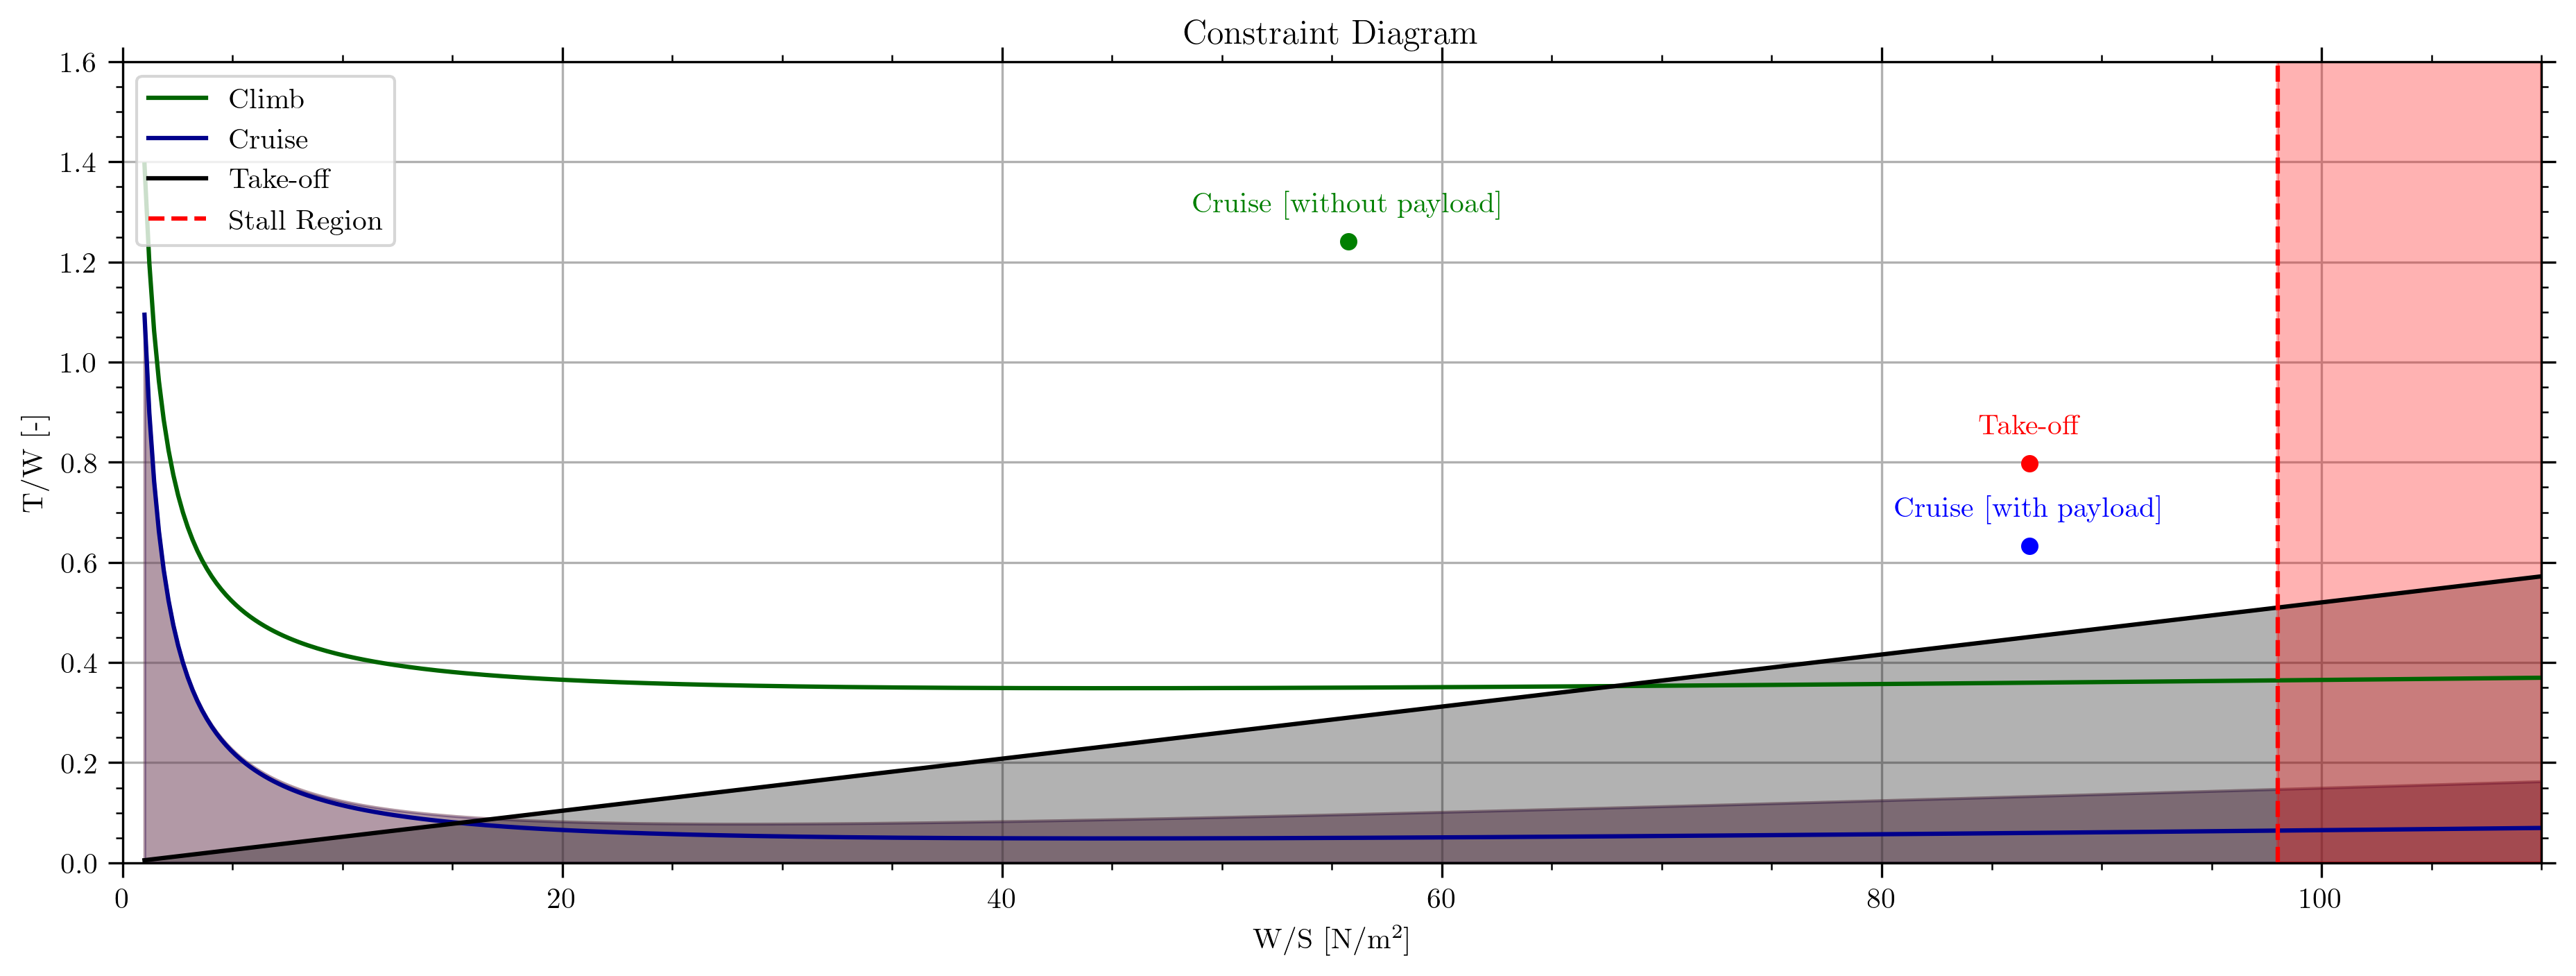

In [199]:
plt.figure(figsize=(15,5), dpi=300)
plt.plot(WS, roc_TW(WS, q, Cd_min, k, V_z, V_t), label='Climb', color='darkgreen')
# plt.fill_between(WS, 0, roc_TW(WS, q, Cd_min, k, V_z, V_t), alpha=0.3, color='darkgreen')
# plt.plot(WS, turn_TW(WS, q, Cd_min, k, n), label='Level Constant Velocity Turn', color='darkorange')
plt.fill_between(WS, 0, turn_TW(WS, q, Cd_min, k, n), alpha=0.3, color='darkorange')
plt.plot(WS, turn_TW(WS, q, Cd_min, k, 1), label='Cruise', color='darkblue')
plt.fill_between(WS, 0, turn_TW(WS, q, Cd_min, k, n), alpha=0.3, color='darkblue')
# plt.plot(WS, to_TW(WS, q_t, Cd_t, S_t, V_t), label='Take-off Distance', color='k')
# plt.fill_between(WS, 0,to_TW(WS, q_t, Cd_t, S_t, V_t), alpha=0.3, color='k')
plt.plot(WS, top_TW(WS, Cl_max, S_t), label='Take-off', color='k')
plt.fill_between(WS, 0, top_TW(WS, Cl_max, S_t), alpha=0.3, color='k')
plt.plot(Wt/S, T0/Wt, 'ro', markersize=5)
plt.annotate('Take-off', (Wt/S, T0/Wt), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.plot(Wt/S, T/Wt, 'bo', markersize=5)
plt.annotate('Cruise [with payload]', (Wt/S, T/Wt), textcoords="offset points", xytext=(0,10), ha='center', color='blue')
plt.plot(W0/S, T0/W0, 'go', markersize=5)
plt.annotate('Cruise [without payload]', (W0/S, T0/W0), textcoords="offset points", xytext=(0,10), ha='center', color='green')
plt.vlines(Ws/S, 0, 1.6, color='r', linestyle='--', label='Stall Region')
plt.fill_betweenx(TW, Ws/S, 110, alpha=0.3, color='r')
plt.xlabel('W/S [N/m$^2$]')
plt.ylabel('T/W [-]')
plt.title('Constraint Diagram')
plt.xlim(0, 110)
plt.ylim(0, 1.6)
plt.grid()
plt.legend(loc='upper left')
plt.show()

In [196]:
4.5*9.81/S

55.73863636363637

In [201]:
Wt/(S**(3/2))/9.81

9.931395280392875

In [202]:
W0/(S**(3/2))/9.81

6.384468394538277